# Introduction

**This notebook is a guide for beginners into machine learning, logistic regression to be more specific. There will be comments every step of the way so there is a clear understanding. We will be building a system that predicts whether a person has heart disease or not.**

# Supervised Machine Learning

**Machine learning is divided into supervised and unsupervised learning. We train our model with data that we have previously acquired in supervised learning. In unsupervised learning, we have no data that we can train our model with.**

**Supervised machine learning is divided into classification and regression. In classification, we predict discrete values, e.g. Yes/No, Customer will purchase/Won't purchase. But in regression, we predict continuous values, such as age, price, etc.**

# Logistic Regression

**Don’t confuse this classification algorithms with regression methods for using regression in its title. Logistic regression performs binary classification, so the label outputs are binary. We can also think of logistic regression as a special case of linear regression when the output variable is categorical, where we are using a log of odds as the dependent variable.**

# Importing Libraries and dataset

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
heart_data = pd.read_csv("../input/heart-disease-uci/heart.csv")
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**1 means the person has heart disease and 0 means they don't.**

# Missing Values

In [3]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Good thing we have no missing values in this dataset so no imputation (replacing missing values with other appropriate ones) necessary.**

# Exploratory Data Analysis

<AxesSubplot:>

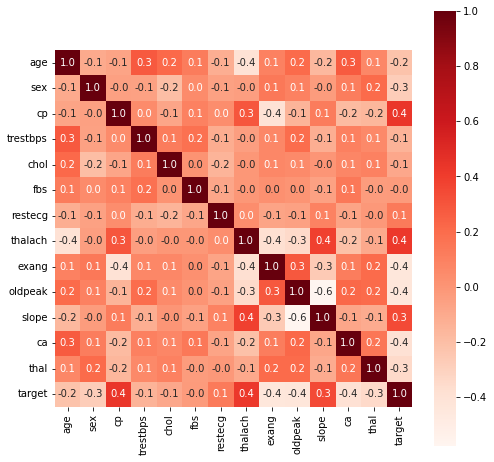

In [4]:
# We can use a heatmap to check correlation between the variables.
corr = heart_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')

**We can make observations such as, as chest pain (cp) increases, the likelihood of having heart disease increases. As oldpeak increases,the likelihood of having heart disease decreases.**

<AxesSubplot:xlabel='target', ylabel='count'>

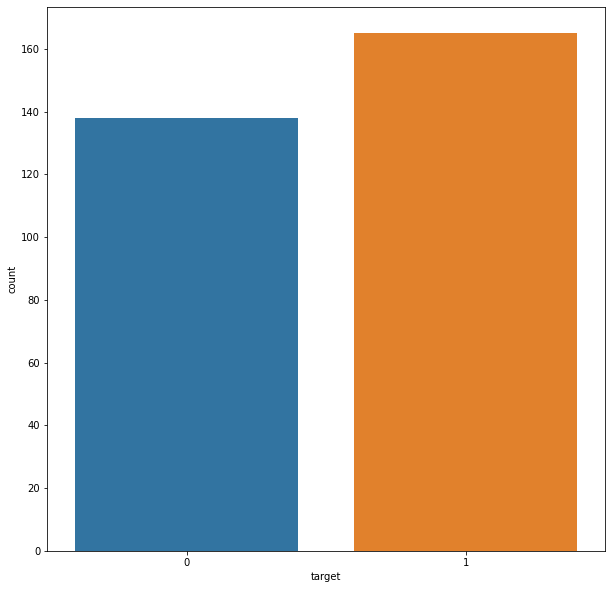

In [5]:
plt.figure(figsize=(10,10))
sns.countplot(x="target", data=heart_data)

**We have more samples of people with heart disease. Also, we only have 303 samples total which is very less. Predictions would be more reliable if we had more data.**

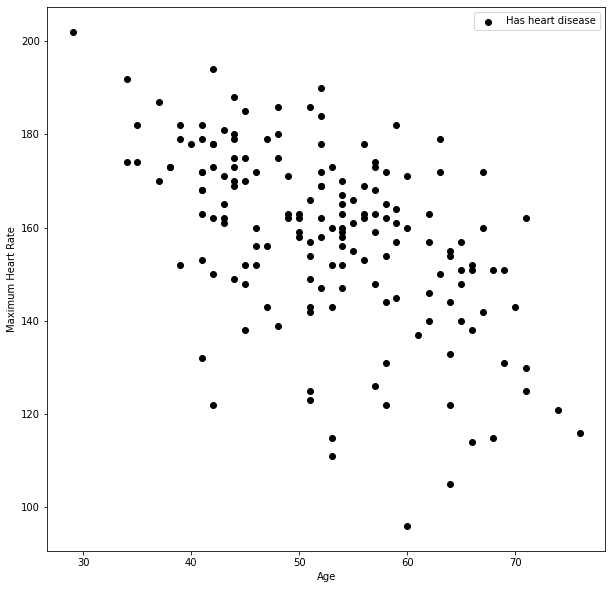

In [6]:
# Heart disease across ages
plt.figure(figsize=(10,10))
plt.scatter(x=heart_data.age[heart_data.target == 1] , y=heart_data.thalach[heart_data.target == 1],c='black')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.legend(['Has heart disease'])

**We can see a lot of cluster around the ages 40-60 so most heart patients are around these ages.**

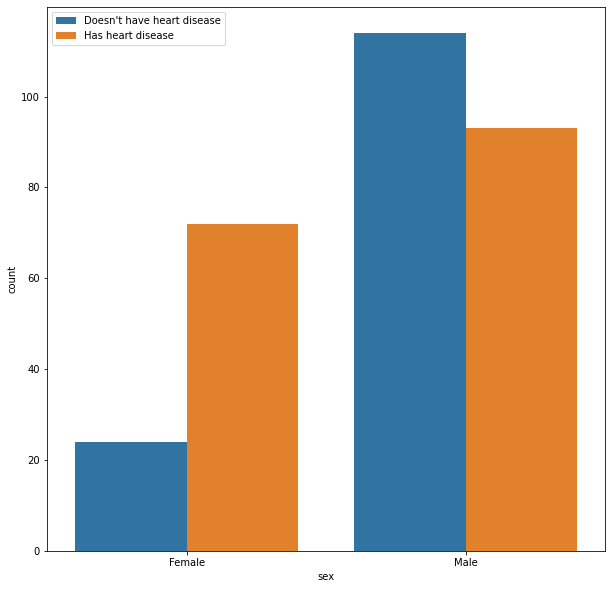

In [7]:
# Heart disease across sexes
plt.figure(figsize=(10,10))
sns.countplot(data=heart_data,x='sex',hue='target')
plt.xticks(ticks = [0,1], labels = ['Female','Male'])
plt.legend(["Doesn't have heart disease", 'Has heart disease'])

**This graph tells us that females tend to have heart disease more but males do not. This could be true but we do have very less samples of females in comparison to males, so this data isn't completely reliable.**

# Splitting Data

In [8]:
# We need to split the data
X = heart_data.drop(['target'],axis=1) # We need all the variables (columns) as independent variables so we're just dropping the target column to make things easier.
y = heart_data['target'] # Target.

In [9]:
# Then we split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2) # 80% data will be used for training the model and rest 20% for testing.

In [10]:
print(X.shape,X_train.shape)

(303, 13) (242, 13)


**As we can see, 242 rows are used for testing out of 303 which is about 79.9% of the data.**

# Model Building

**We're going to use a logistics regression model.**

In [11]:
model = LogisticRegression(solver='liblinear')

In [12]:
# Now we need to train the model
model.fit(X_train,y_train) # fitting means training

LogisticRegression(solver='liblinear')

# Prediction and Evaluation of the Model

**First, we need to use the model to predict heart disease/not from the training data. Then, we check our model's accuracy using accuracy score (for classification).**

In [13]:
train_pred = model.predict(X_train)
train_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0])

In [14]:
# Now let's check accuracy score on training data
Training_score = accuracy_score(train_pred,y_train) #(Basically comparing the original y_train and predictions and seeing difference/error)
print("Accuracy Score:",Training_score)

Accuracy Score: 0.8264462809917356


**Our model is 82.6% accurate which is very good.**

**But keep in mind that we used training data to check accuracy. We need to check using test data for a better understanding.**

In [15]:
test_pred = model.predict(X_test)
test_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1])

In [16]:
# Accuracy Score
Test_score = accuracy_score(test_pred,y_test) 
print("Accuracy Score:",Test_score)

Accuracy Score: 0.9016393442622951


**Accuracy score for test data is much better, at 90.2%. This means the model is very accurate and will predict accurately most of the time.**

# Conclusion

So basically the workflow is like this: Import libraries and dataset -> check for missing values -> perform necessary imputation -> Exploratory Data Analysis -> split data -> train model -> check its accuracy -> improve model or try other ones.

**To get better accuracy, try different models or use more training data.**